In [1]:
import pandas as pd 

In [2]:
data=pd.read_csv("Advertising.csv")

In [3]:
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
data.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [6]:
data.isnull().any()

Unnamed: 0    False
TV            False
Radio         False
Newspaper     False
Sales         False
dtype: bool

In [7]:
data.drop('Unnamed: 0',axis=1,inplace=True)

In [8]:
data.describecribe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [13]:
import matplotlib.pyplot as plt

In [14]:
import seaborn as sb

<Axes: xlabel='count', ylabel='Sales'>

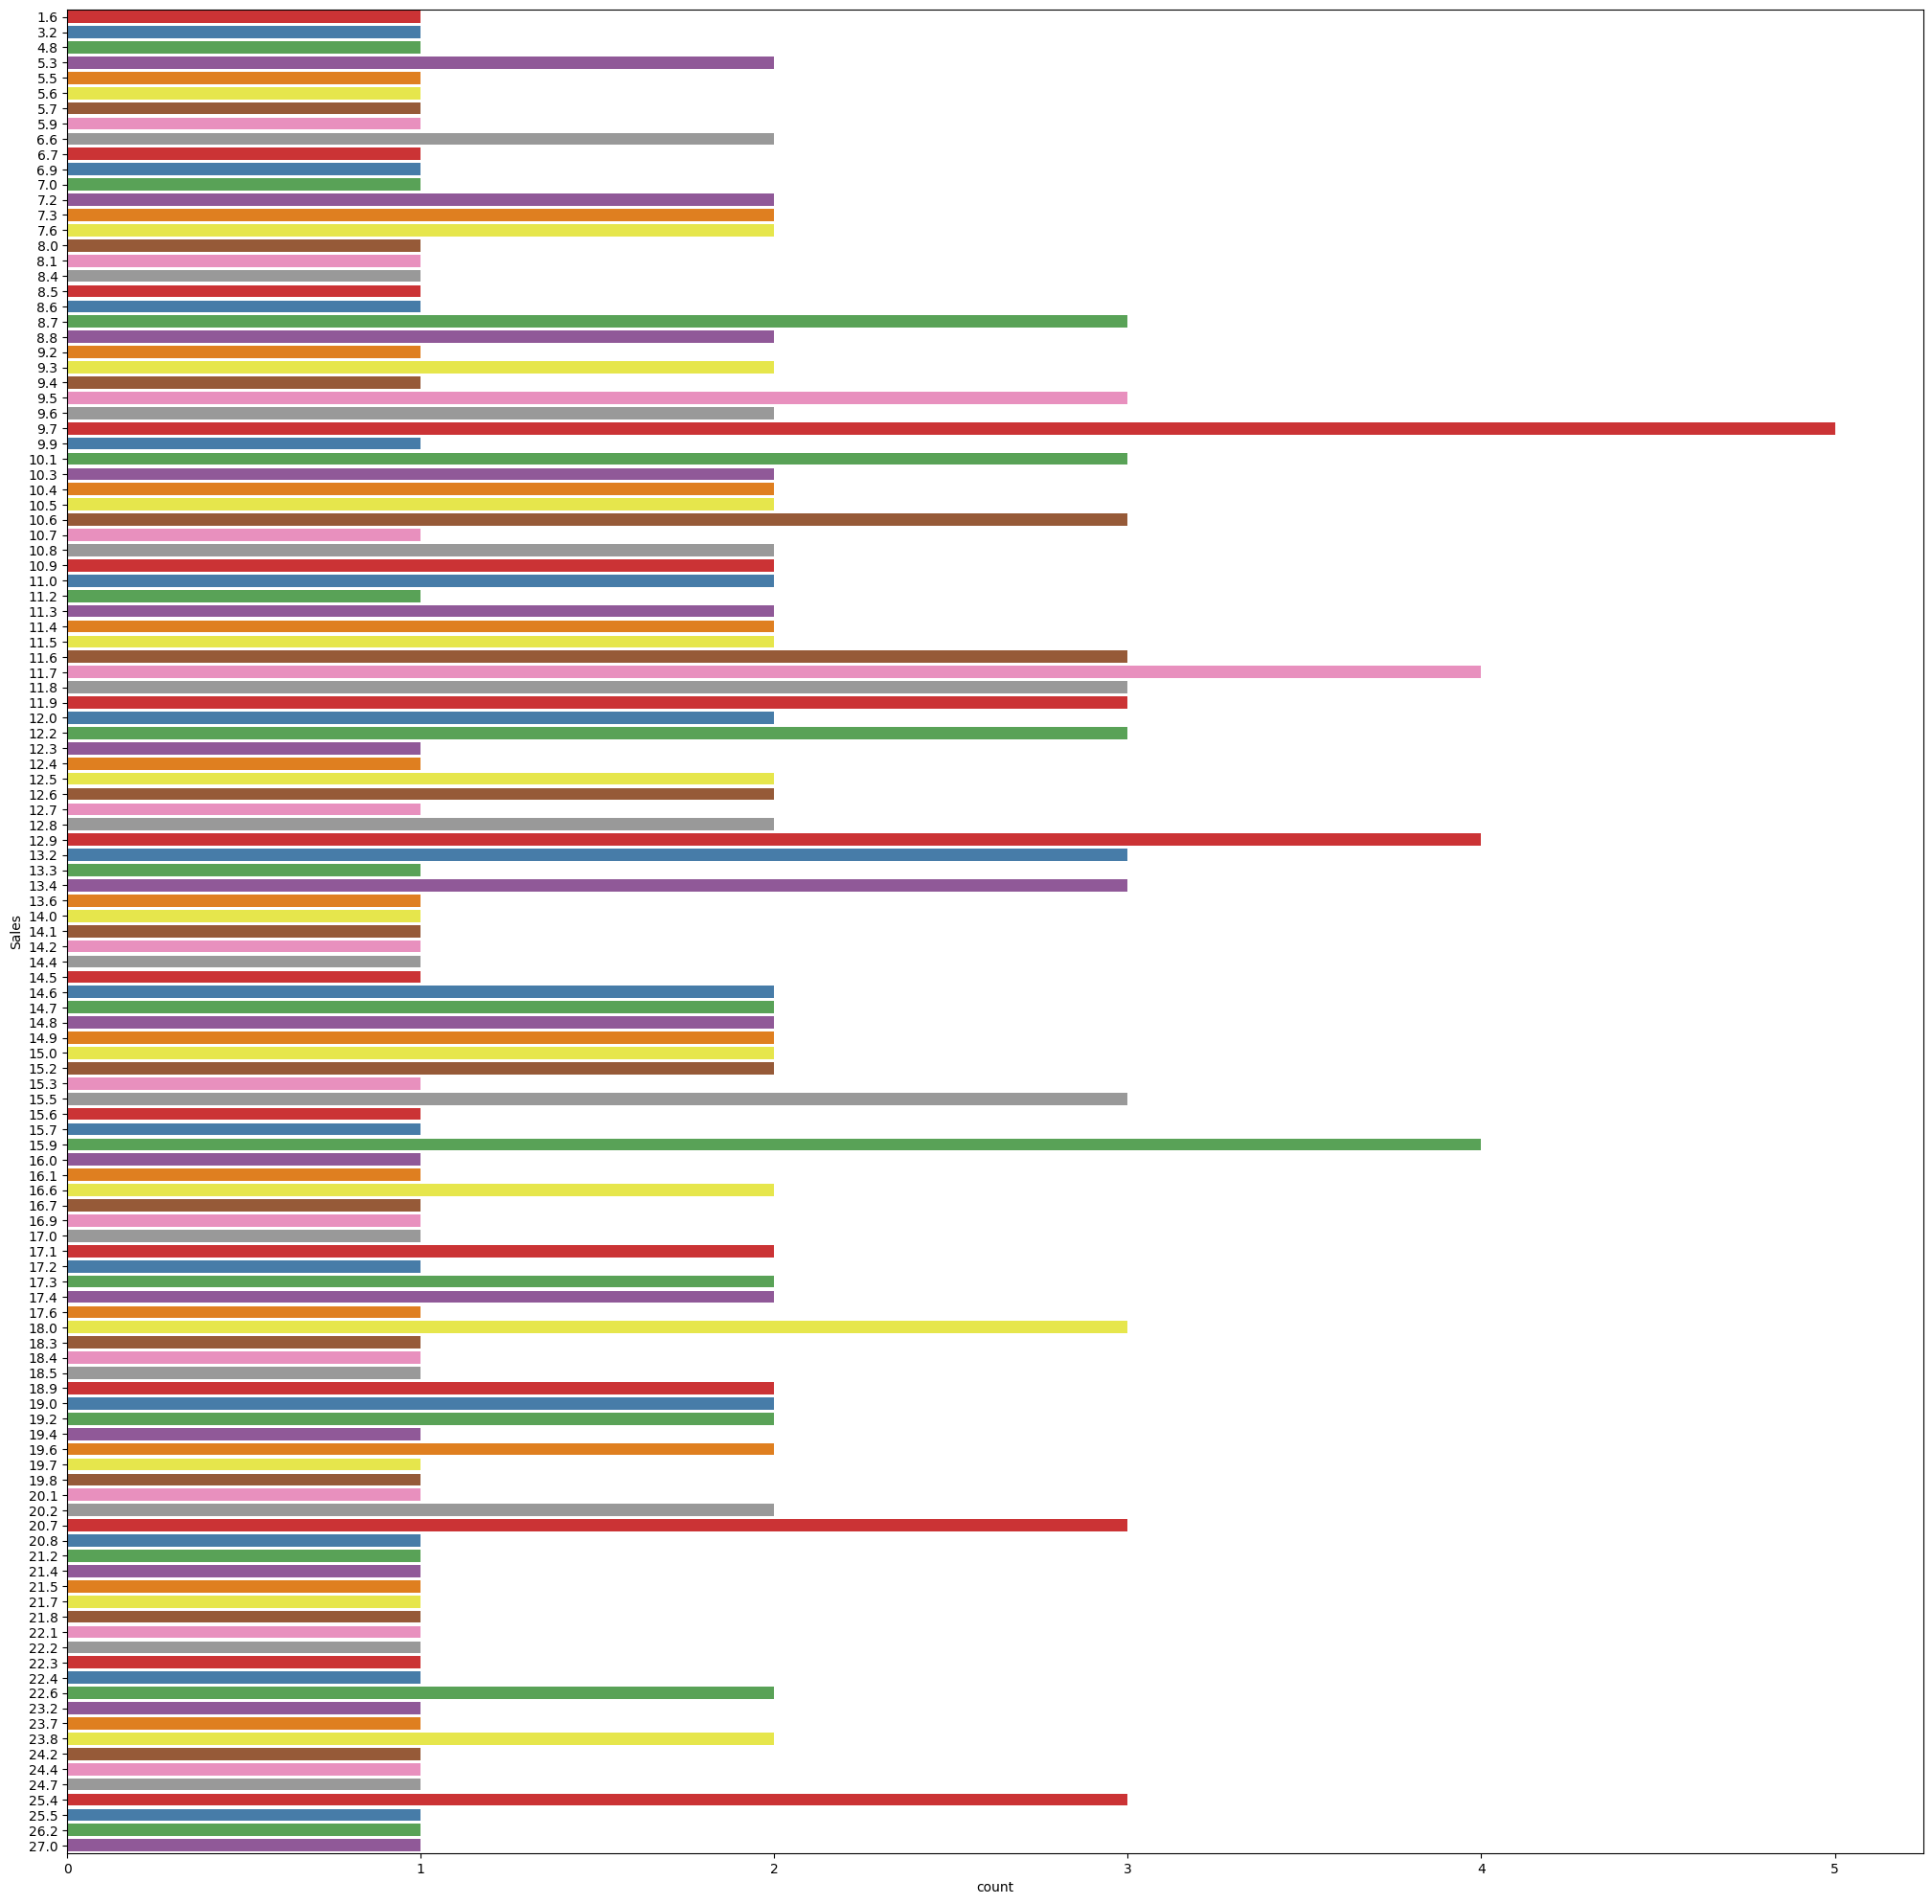

In [15]:
plt.figure(figsize=(25,25))
sb.countplot(y="Sales",data=data,palette="Set1")

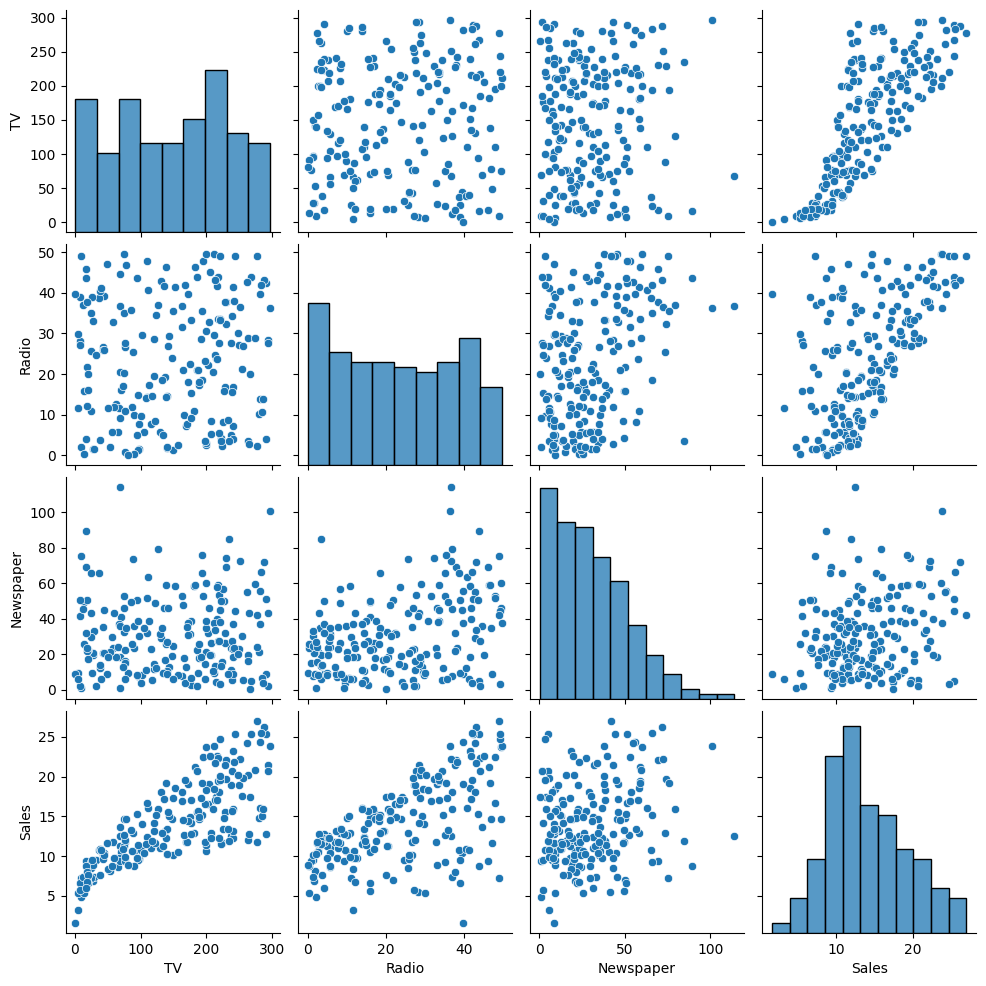

In [16]:
sb.pairplot(data)


In [19]:
x=data.drop("Sales",axis=1)

In [21]:
y=data["Sales"]

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3)

In [29]:
from sklearn.ensemble import AdaBoostRegressor

model = AdaBoostRegressor(random_state=0, n_estimators=100)


In [30]:
model.fit(xtrain,ytrain)

AdaBoostRegressor(n_estimators=100, random_state=0)

In [31]:
ypred=model.predict(xtest)

In [35]:
train_pred=model.predict(xtrain)

In [32]:
from sklearn.metrics import mean_squared_error, r2_score


In [36]:
print('Train MSE',mean_squared_error(ytrain,train_pred))
print('Test MSE',mean_squared_error(ytest,ypred))
print('Train R^2',r2_score(ytrain,train_pred))
print('Test R^2',r2_score(ytest,ypred))

Train MSE 0.5938057217945036
Test MSE 1.0665174008640588
Train R^2 0.9770927584930954
Test R^2 0.9639972352466641
